# Imports

In [2]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from astropy.io import fits
from astropy import coordinates as coords
from astropy import units as u

import warnings
warnings.filterwarnings('ignore')

# Astroquery -- SDSS

In [3]:
from astroquery.sdss import SDSS

## Query for object

In [4]:
# Define the coordinate of object of interest and pass to SDSS for querying
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, radius=0.5*u.arcsec, spectro=True) # require that the object have spectroscopy, not just photometry

xid

<Table length=1>
       ra              dec               objid        ... run2d instrument
    float64          float64             int64        ... int64   bytes4  
---------------- ---------------- ------------------- ... ----- ----------
2.02344596303101 14.8398237521302 1237652943176138868 ...    26       SDSS

## Retrieve object spectrum and image

In [5]:
# Get spectra and image of this field
sp = SDSS.get_spectra(matches=xid, radius=0.2*u.arcsec)
im = SDSS.get_images(matches=xid, radius=0.2*u.arcsec, band='g')

In [6]:
sp

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1175c5cf8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1175db5c0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1175e8748>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119529240>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x119536eb8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11954f908>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1196953c8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1196a5dd8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1196bd828>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11971d0f0>]]

### Plot spectrum

In [13]:
sp[0][1]

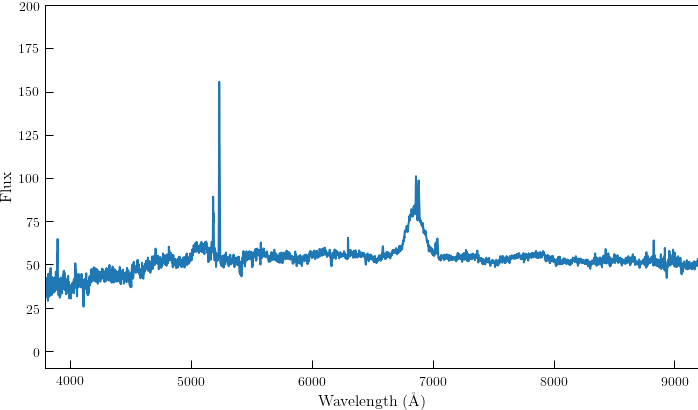

In [7]:
plt.subplots(figsize=(10,6))
plt.plot(10**sp[0][1].data['loglam'], sp[0][1].data['flux'])
plt.ylim(-10, 200)
plt.xlabel(r'Wavelength ($\textnormal{\AA}$)')
plt.ylabel('Flux')
plt.show()

### Plot image

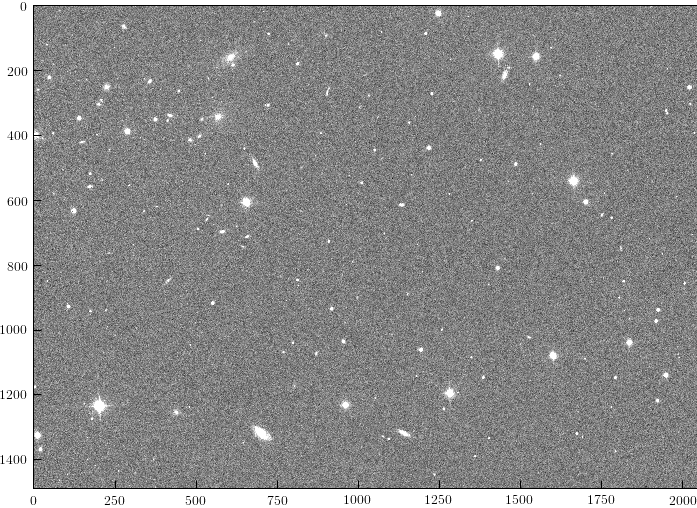

In [8]:
plt.subplots(figsize=(10,10))
plt.imshow(im[0][0].data, vmin=-0.1, vmax=0.1, cmap='gist_gray') 
plt.show()

# Astroquery -- HST

In [15]:
from astroquery.mast import Mast, Observations
from astropy.visualization import make_lupton_rgb, ImageNormalize

INFO: Found cached file ./mastDownload/HST/ib6w61060/ib6w61060_asn.fits with expected size 11520. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61060/ib6w61060_drc.fits with expected size 228507840. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w61060/ib6w61060_drz.fits with expected size 228507840. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62010/ib6w62010_asn.fits with expected size 11520. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62010/ib6w62010_drc.fits with expected size 222914880. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62010/ib6w62010_drz.fits with expected size 222914880. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_asn.fits with expected size 11520. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ib6w62020/ib6w62020_drc.fits with expected size 228568320. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/i

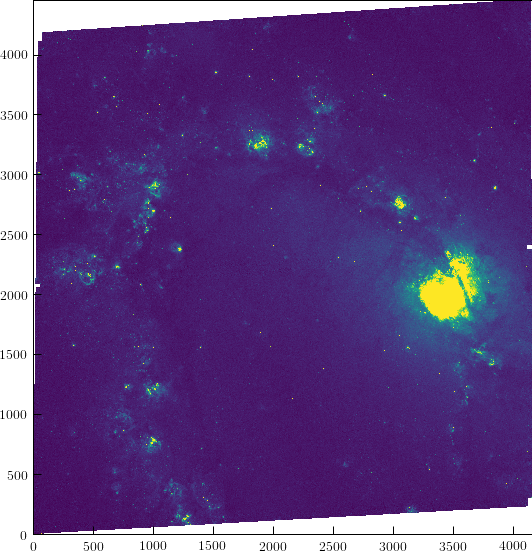

In [17]:
result = Observations.query_object('M83')
selected_bands = result[(result['obs_collection'] == 'HST') &
                        (result['instrument_name'] == 'WFC3/UVIS') &
                        ((result['filters'] == 'F657N') |
                         (result['filters'] == 'F487N') |
                         (result['filters'] == 'F336W')) &
                        (result['target_name'] == 'MESSIER-083')]
prodlist = Observations.get_product_list(selected_bands)
filtered_prodlist = Observations.filter_products(prodlist)

downloaded = Observations.download_products(filtered_prodlist)

blue = fits.open(downloaded['Local Path'][2])
red = fits.open(downloaded['Local Path'][5])
green = fits.open(downloaded['Local Path'][8])

target_header = red['SCI'].header
#green_repr, _ = reproject.reproject_interp(green['SCI'], target_header)
#blue_repr, _ = reproject.reproject_interp(blue['SCI'], target_header)


#rgb_img = make_lupton_rgb(ImageNormalize(vmin=0, vmax=1)(red['SCI'].data),
#                          ImageNormalize(vmin=0, vmax=0.3)(green['SCI'].data),
#                          ImageNormalize(vmin=0, vmax=1)(blue['SCI'].data),
#                          stretch=0.1,
#                          minimum=0,
#                         )
plt.subplots(figsize=(8,8))
#plt.imshow(red['SCI'].data, origin='lower', interpolation='none', vmin=0, vmax=1)
plt.imshow(red['SCI'].data, origin='lower', interpolation='none', vmin=0, vmax=0.3)
plt.show()

In [18]:
filtered_prodlist

<Table masked=True length=9>
  obsID    obs_collection dataproduct_type ...    size   parent_obsid
  str10         str3            str5       ...   int64      str10    
---------- -------------- ---------------- ... --------- ------------
2003841056            HST            image ...     11520   2003841056
2003841056            HST            image ... 228507840   2003841056
2003841056            HST            image ... 228507840   2003841056
2003841060            HST            image ...     11520   2003841060
2003841060            HST            image ... 222914880   2003841060
2003841060            HST            image ... 222914880   2003841060
2003841061            HST            image ...     11520   2003841061
2003841061            HST            image ... 228568320   2003841061
2003841061            HST            image ... 228568320   2003841061

# Astroquery -- MAST

In [19]:
from astroquery.mast import Observations

In [31]:
obsTable = Observations.query_region("219.637882 54.435309")

obsTable

<Table masked=True length=31>
dataproduct_type obs_collection ...    objID         distance     
      str5            str5      ...    str11         float64      
---------------- -------------- ... ----------- ------------------
           image            PS1 ... 16000867877                0.0
           image            PS1 ... 16000867878                0.0
           image            PS1 ... 16000867879                0.0
           image            PS1 ... 16000867880                0.0
           image            PS1 ... 16000867881                0.0
           image            PS1 ... 16000867827  177.4975784954349
           image            PS1 ... 16000867828  177.4975784954349
           image            PS1 ... 16000867829  177.4975784954349
           image            PS1 ... 16000867830  177.4975784954349
           image            PS1 ... 16000867831  177.4975784954349
             ...            ... ...         ...                ...
           image            PS1 ... 16000867333  303.8323510825833
           image            PS1 ... 16000867334  303.8323510825833
           image            PS1 ... 16000867335  303.8323510825833
           image            PS1 ... 16000867336  303.8323510825833
           image            PS1 ... 16000867282 392.46356021122824
           image            PS1 ... 16000867283 392.46356021122824
           image            PS1 ... 16000867284 392.46356021122824
           image            PS1 ... 16000867285 392.46356021122824
           image            PS1 ... 16000867286 392.46356021122824
           image          GALEX ...  1000004934  221.5849101651905

In [27]:
dataProductsByObservation = Observations.get_product_list(obsTable[0])

In [22]:
dataProductsByObservation

<Table masked=True length=210>
  obsID    obs_collection dataproduct_type ...   size   parent_obsid
  str10         str5            str5       ...  int64      str10    
---------- -------------- ---------------- ... -------- ------------
1000064893          GALEX            image ...    49115   1000004953
1000064893          GALEX            image ...  4520227   1000004953
1000064893          GALEX            image ...   158585   1000004953
1000064893          GALEX            image ...    21278   1000004953
1000064893          GALEX            image ...    33574   1000004953
1000064893          GALEX            image ...    20385   1000004953
1000064893          GALEX            image ... 20623821   1000004953
1000064893          GALEX            image ...  6354441   1000004953
1000064893          GALEX            image ...   281761   1000004953
1000064893          GALEX            image ...  1399939   1000004953
       ...            ...              ... ...      ...          ...
1000004953          GALEX            image ...      604   1000004953
1000004953          GALEX            image ...     1169   1000004953
1000004953          GALEX            image ...      682   1000004953
1000004953          GALEX            image ...    38833   1000004953
1000004953          GALEX            image ...  2013908   1000004953
1000004953          GALEX            image ...   371693   1000004953
1000004953          GALEX            image ...   377450   1000004953
1000004953          GALEX            image ...   445398   1000004953
1000004953          GALEX            image ...   102488   1000004953
1000004953          GALEX            image ... 15961130   1000004953

In [23]:
filtered_prodlist = Observations.filter_products(dataProductsByObservation)

downloaded = Observations.download_products(filtered_prodlist)

INFO: Found cached file ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-flags.fits.gz with expected size 36615. [astroquery.query]
INFO: Found cached file ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-rrhr.fits.gz with expected size 5641122. [astroquery.query]
INFO: Found cached file ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-skybg.fits.gz with expected size 2092663. [astroquery.query]
INFO: Found cached file ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-xd-mcat.fits.gz with expected size 8439897. [astroquery.query]
INFO: Found cached file ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-int.fits.gz with expected size 15961130. [astroquery.query]


In [24]:
downloaded

<Table length=5>
                                    Local Path                                     ...
                                      str82                                        ...
---------------------------------------------------------------------------------- ...
./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-flags.fits.gz ...
 ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-rrhr.fits.gz ...
./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-skybg.fits.gz ...
 ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-xd-mcat.fits.gz ...
  ./mastDownload/GALEX/3212054033460101120/GI5_028136_W3_10259_0102-nd-int.fits.gz ...

In [25]:
galex = fits.open(downloaded['Local Path'][4])

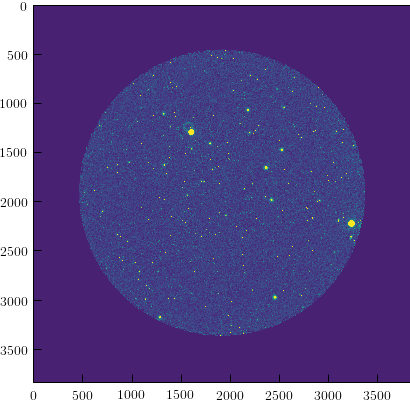

In [26]:
plt.subplots(figsize=(6,6))
plt.imshow(galex[0].data, vmin=-0.002, vmax=0.02)
plt.show()

# Astroquery -- GAIA

In [32]:
from astroquery.gaia import Gaia

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


The query that appears in "" in the following job is copied from submitting a basic query on the Gaia Archive (https://gea.esac.esa.int/archive/) and then clicking 'Show Query' at the bottom of the page instead of submitting the query.

The number of results have increased from 2000 (the max on the Basic Query) to 40000.

The Gaia Archive query uses the function 'EPOCH_PROP_POS', which takes in the following parameters:

EPOCH_PROP_POS(ra,dec,plx,pmra,pmdec,rv,T0,T1):

Returns an ADQL point with the propagated position (RA, Dec) from the reference epoch T0 to an arbitrary epoch T1, where:
ra [double]: Right Ascension (deg)

dec [double]: Declination (deg)

plx [double]: Parallax (mas)

pmra [double]: Proper Motion in Right Ascension (mas/yr)

pmde [double]: Proper Motion in Declination (mas/yr)

rv [double]: Radial Velocity (km/s)

T0 [double]: Reference Julian Epoch (yr)

T1 [double]: Final Julian Epoch (yr)

## NGC5272

In [33]:
ngc5272_job = Gaia.launch_job("SELECT TOP 40000 ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val FROM gaiadr2.gaia_source  WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',COORD1(EPOCH_PROP_POS(205.548417,28.377278,0,-5.6400,-6.1300,-141.2000,2000,2015.5)),\
COORD2(EPOCH_PROP_POS(205.548417,28.377278,0,-5.6400,-6.1300,-141.2000,2000,2015.5)),0.3333333333333333))=1  ")

In [34]:
ngc5272 = ngc5272_job.get_results()
ngc5272

<Table masked=True length=36424>
        ra               ra_error      ... radial_velocity_error teff_val
       deg                 mas         ...        km.s**-1          K    
     float64             float64       ...        float64        float32 
------------------ ------------------- ... --------------------- --------
205.39918446572392 0.23897568005290976 ...                    --       --
205.53999845118128  0.2469261811533887 ...                    --       --
205.57803376137284     0.2998548757703 ...                    --       --
205.50150222165712 0.18138544759207015 ...                    --       --
 205.5427418829808  3.1170410558246044 ...                    --       --
 205.5089663238055 0.43280773593975563 ...                    --       --
205.53167511664012  0.8000356378423074 ...                    --       --
 205.5310563482328  0.6158131654748271 ...                    --       --
 205.5461375051817  0.9894950244302438 ...                    --       --
               ...                 ... ...                   ...      ...
205.44058055788602 0.18901506382739147 ...                    --       --
205.48825359355354   3.970294817113094 ...                    --       --
205.47530175177337 0.20012550020627606 ...                    --       --
205.49240473935464  0.3449895201150001 ...                    --       --
205.49607322426732   3.507006809174684 ...                    --       --
205.50304419538628   0.177795363155016 ...                    --       --
205.46882882502396  0.4685011869278214 ...                    --       --
205.51113529317874  0.6330109561986252 ...                    --       --
205.45720445062042  1.3916258995653352 ...                    --       --
 205.3980631616154  0.5182489145734696 ...                    --       --

## Find potential cluster non-members

### NGC5272 Tidal Radius

NGC5272 mass found in literature (4.5e5; Wiki links to http://adsabs.harvard.edu/abs/2010MNRAS.406.2000M).

In [35]:
M_mw = 5.8e11*u.Msun #1e12*u.Msun # Milky Way mass

M_ngc5272 = 4.5e5*u.Msun
R_ngc5272 = (12.2*u.kpc).to(u.lightyear) # Distance from NGC5373 to the center of the MW
d_ngc5272 = 33.9e3*u.lightyear

In [36]:
def tidal_radius(R_gc, M_gc, M_mw):
    r_tidal = R_gc * (M_gc / (2*M_mw))**(1./3.)
    return r_tidal

In [37]:
ngc5272_tidalrad = tidal_radius(R_ngc5272, M_ngc5272, M_mw)

print ('NGC 5272 tidal radius:', tidal_radius(R_ngc5272, M_ngc5272, M_mw))

NGC 5272 tidal radius: 290.2043251082997 lyr


### Angular radius

What does this physical tidal radius translate to as an angular size in the sky?

In [38]:
def angular_radii(physical_diameter, distance):
    assert(physical_diameter.unit == distance.unit), 'Check units on input values'
    
    angular_diam = 206265*(physical_diameter / distance)*u.arcsecond
    
    return angular_diam.to(u.arcmin)/2.

In [39]:
ngc5272_angrad = angular_radii(ngc5272_tidalrad, d_ngc5272)

print ('angular size in sky:', ngc5272_angrad)

angular size in sky: 14.714600569927097 arcmin


### Absolute magnitude

In [ ]:
# Trying to get a distance to the objects by their measured Gaia parallax
ngc5272['distance'] = 1./(ngc5272['parallax'])

The above method of using parallax to measure distances yields a lot of negative distances...

Trying instead with a distance found in literature (10.4 kpc; Wiki links to http://iopscience.iop.org/article/10.1088/0004-6256/139/2/476/pdf).

In [40]:
M_g = ngc5272['phot_g_mean_mag'] - ( 5*np.log10(10.4*1e3) - 5)

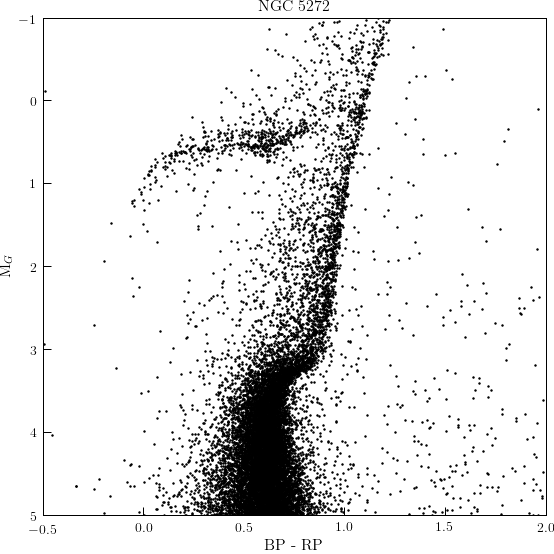

In [41]:
plt.subplots(figsize=(8,8))
#plt.plot(ngc288['bp_rp'], ngc288['phot_g_mean_mag'], 'o')
#plt.plot(ngc5272['bp_rp'], ngc5272['phot_g_mean_mag'], '.')
#plt.plot(ngc5272['bp_rp'], M_g, '.')
plt.scatter(ngc5272['bp_rp'], M_g, color='black', s=2)

plt.xlim(-0.5, 2.0)
plt.ylim(5, -1)
plt.xlabel('BP - RP')
plt.ylabel(r'M_{G}')
plt.title('NGC 5272')
plt.show()

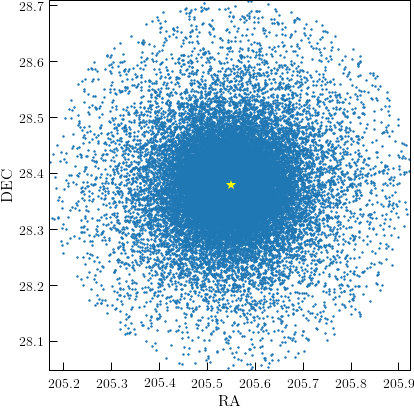

In [42]:
plt.subplots(figsize=(6,6))
plt.scatter(ngc5272['ra'], ngc5272['dec'], s=2)
plt.plot(np.mean(ngc5272['ra']), np.mean(ngc5272['dec']), marker='*', markersize=10, color='yellow')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

### Proper Motion RA, Dec

In [43]:
def distance(ra, dec, ra_cent, dec_cent):
    # NGC5272 proper motion from Simbad http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+5272
    dist = np.sqrt ((ra - ra_cent)**2. + (dec - dec_cent)**2.)
    return dist

In [44]:
pm_dist = distance(ngc5272['pmra'], ngc5272['pmdec'], np.ma.median(ngc5272['pmra']), np.ma.median(ngc5272['pmdec']))
radec_dist = (distance(ngc5272['ra'], ngc5272['dec'], np.ma.median(ngc5272['ra']), np.ma.median(ngc5272['dec']))*u.deg).to(u.arcmin)

In [46]:
pm_non_memb = np.where(pm_dist > 20) # 20 here is arbitrary for what's outside of the cluster proper motion
radec_non_memb = np.where((radec_dist.value > ngc5272_angrad.value) & (radec_dist.value < 30))

pm_and_radec_non_memb = np.intersect1d(pm_non_memb, radec_non_memb)

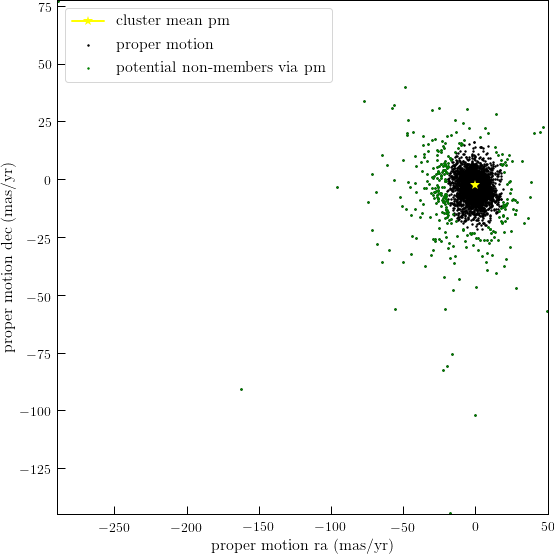

In [47]:
plt.subplots(figsize=(8,8))
plt.scatter(ngc5272['pmra'], ngc5272['pmdec'], s=2, label='proper motion', color='black')
plt.scatter(ngc5272['pmra'][pm_non_memb], ngc5272['pmdec'][pm_non_memb], s=2, color='green', label='potential non-members via pm')
plt.plot(np.ma.median(ngc5272['pmra']), np.ma.median(ngc5272['pmdec']), markersize=10, marker='*', color='yellow', label='cluster mean pm')
plt.xlabel('proper motion ra (mas/yr)')
plt.ylabel('proper motion dec (mas/yr)')
plt.legend(loc='upper left', fontsize=16)
plt.show()

### CMD w/potential non-members

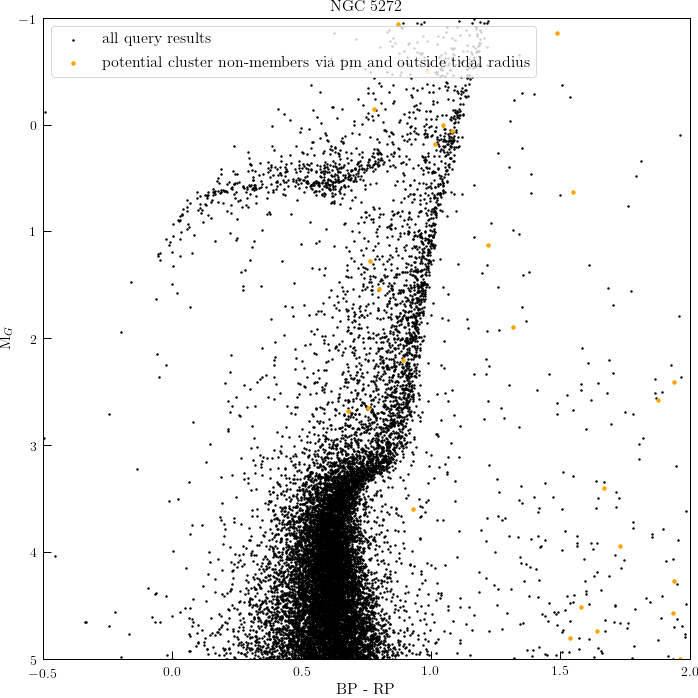

In [48]:
plt.subplots(figsize=(10, 10))
plt.scatter(ngc5272['bp_rp'], M_g, s=2, label='all query results', color='black')
plt.scatter(ngc5272['bp_rp'][pm_and_radec_non_memb], M_g[pm_and_radec_non_memb], color='orange', s=12, label='potential cluster non-members via pm and outside tidal radius')

plt.xlim(-0.5, 2.0)
plt.ylim(5, -1)
plt.xlabel('BP - RP')
plt.ylabel(r'M_{G}')
plt.title('NGC 5272')
plt.legend(fontsize=16)
plt.show()